<a href="https://colab.research.google.com/github/shubhxm02/Colab_Notebooks/blob/main/coursera/coursera_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

# YOUR CODE STARTS HERE
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.9980):
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

# YOUR CODE ENDS HERE

mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# YOUR CODE STARTS HERE
training_images_nm = training_images/255.0
test_images_nm = test_images/255.0
training_images_nm = training_images_nm.reshape(60000, 28, 28, 1)
test_images_nm = test_images_nm.reshape(10000, 28, 28, 1)
# YOUR CODE ENDS HERE

model = keras.models.Sequential([
    # YOUR CODE STARTS HERE
    keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(100, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()
model.fit(training_images_nm, training_labels, epochs=20, callbacks=[callbacks])
model.evaluate(test_images_nm, test_labels)
# YOUR CODE ENDS HERE


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 100)       1000      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 100)       90100     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               375150    
_________________________________________________________________
dense_11 (Dense)             (None, 50)               

[0.037551429122686386, 0.9919999837875366]

In [ ]:
predicted_labels = model.predict(test_images_nm)

In [ ]:
import numpy as np
test_labels_predicted = [np.argmax(x) for x in predicted_labels]
# for i in range(len(predicted_labels)):
#     test_labels_predicted[i] = np.argmax(predicted_labels[i])

In [ ]:
ind = 100
test_labels_predicted[ind], test_labels[ind]

(6, 6)

In [ ]:
cm = tf.math.confusion_matrix(labels=test_labels, predictions=test_labels_predicted)
em = np.copy(cm)
np.fill_diagonal(em, 0)
# cm, em

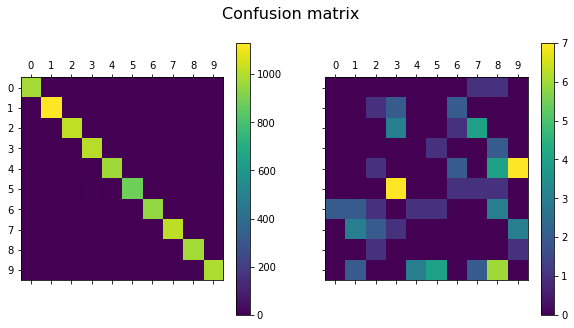

In [ ]:
import matplotlib.pyplot as plt
mat = plt.figure(figsize=(10,5))
ax = mat.subplots(1,2, sharex=True, sharey=True)

z0 = ax[0].matshow(cm)
z1 = ax[1].matshow(em)

ax[0].set_xticks(np.arange(10))
ax[0].set_yticks(np.arange(10))

plt.colorbar(z0, ax = ax[0])
plt.colorbar(z1, ax = ax[1])

mat.suptitle('Confusion matrix', fontsize=16)
plt.show()

In [ ]:
incorrect_labels = []
for ind in range(len(test_labels)):
    if test_labels[ind]!=test_labels_predicted[ind]:
        incorrect_labels.append(ind)
len(incorrect_labels)

80

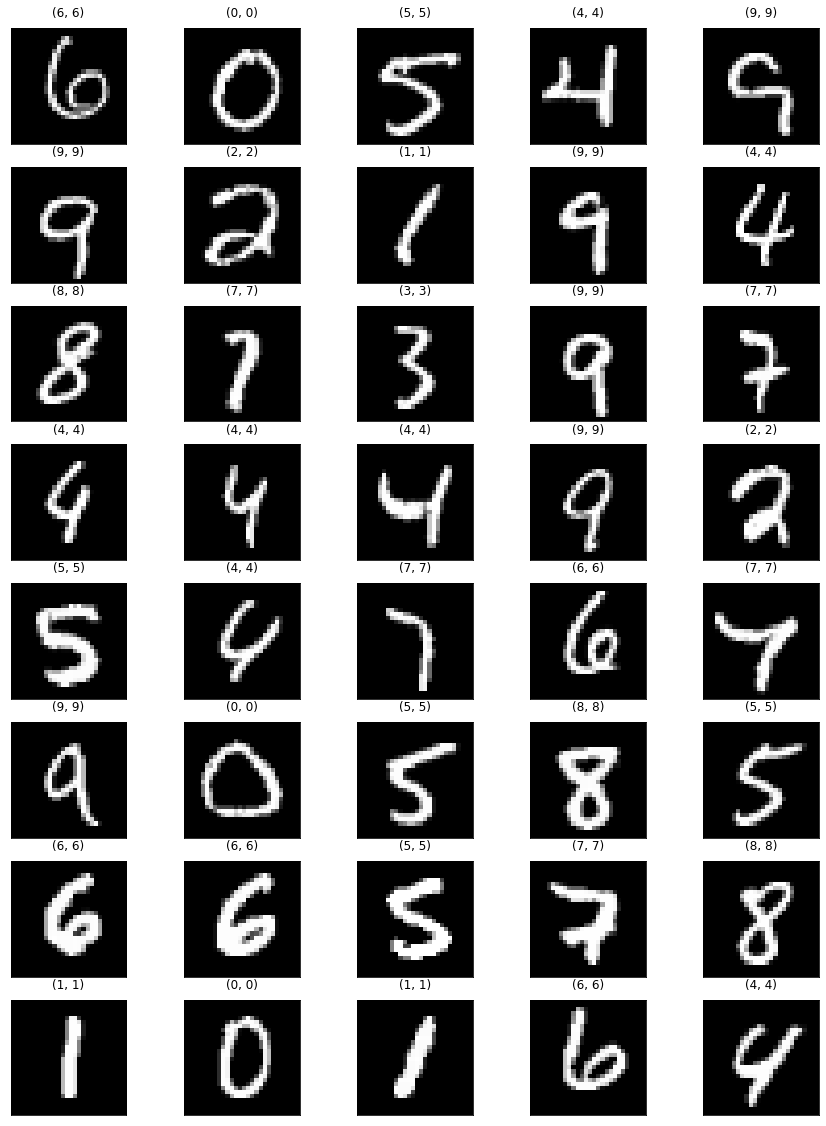

In [ ]:
rows, cols = 8, 5
fig = plt.figure(figsize=(15,20))
val = 100

for r in range(rows):
    for c in range(cols):
        ind = r*cols + c + 1
        ax = fig.add_subplot(rows, cols, ind)
        ax.matshow(test_images[val], cmap='gray')
        ax.set_title((test_labels[val], test_labels_predicted[val]))
        ax.set_xticks([])
        ax.set_yticks([])
        val = val + 1

# plt.subplot(rows, cols, 1)
plt.show()

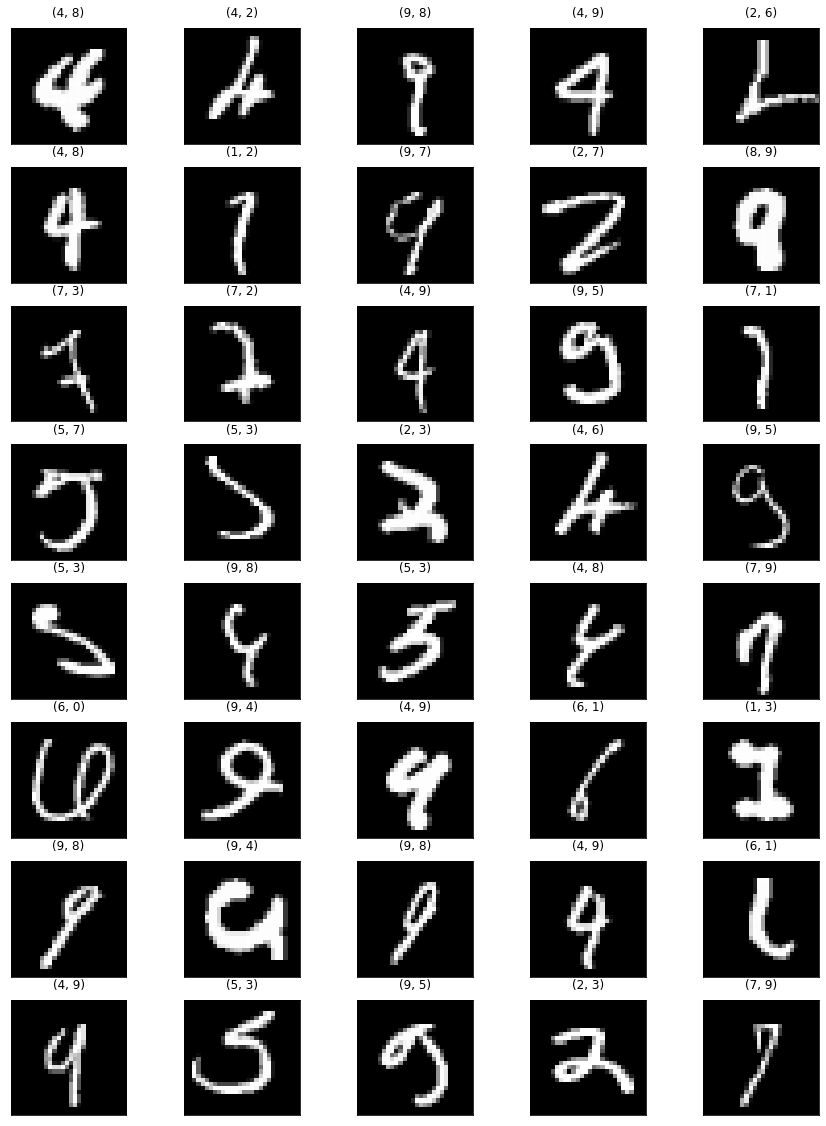

In [ ]:
rows, cols = 8, 5
fig = plt.figure(figsize=(15,20))

for r in range(rows):
    for c in range(cols):
        ind = r*cols + c + 1
        ax = fig.add_subplot(rows, cols, ind)
        val = incorrect_labels[ind]
        ax.matshow(test_images[val], cmap='gray')
        ax.set_title((test_labels[val], test_labels_predicted[val]))
        ax.set_xticks([])
        ax.set_yticks([])

# plt.subplot(rows, cols, 1)
plt.show()